In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import wasserstein_distance

In [3]:
run=100
WD_QRGMM=np.zeros(run)
WD_CWGAN=np.zeros(run)
WD_Diffusion=np.zeros(run)
WD_RectFlow=np.zeros(run)

KS_QRGMM=np.zeros(run)
KS_CWGAN=np.zeros(run)
KS_Diffusion=np.zeros(run)
KS_RectFlow=np.zeros(run)

for runi in range(0,run):
    testdf=pd.read_csv("./data/testdata/testdata" + '_{}.csv'.format(runi+1)) 
    test_gen_QRGMM=pd.read_csv("./data/testdata_QRGMM/testdata_QRGMM" + '_{}.csv'.format(runi+1))
    test_gen_CWGAN=pd.read_csv("./data/testdata_CWGAN/testdata_CWGAN" + '_{}.csv'.format(runi+1))
    test_gen_Diffusion=pd.read_csv("./data/testdata_Diffusion/testdata_Diffusion" + '_{}.csv'.format(runi+1))
    test_gen_RectFlow=pd.read_csv("./data/testdata_RectFlow/testdata_RectFlow" + '_{}.csv'.format(runi+1))
    
    WD_QRGMM[runi]=wasserstein_distance(test_gen_QRGMM.iloc[:,0],testdf.iloc[:,10])
    WD_CWGAN[runi]=wasserstein_distance(test_gen_CWGAN.iloc[:,2], testdf.iloc[:,10])
    WD_Diffusion[runi]=wasserstein_distance(test_gen_Diffusion.iloc[:,2], testdf.iloc[:,10])
    WD_RectFlow[runi]=wasserstein_distance(test_gen_RectFlow.iloc[:,2], testdf.iloc[:,10])
    
    
    KS_QRGMM[runi],_=stats.kstest(test_gen_QRGMM.iloc[:,0],testdf.iloc[:,10])
    KS_CWGAN[runi],_=stats.kstest(test_gen_CWGAN.iloc[:,2], testdf.iloc[:,10])
    KS_Diffusion[runi],_=stats.kstest(test_gen_Diffusion.iloc[:,2], testdf.iloc[:,10])
    KS_RectFlow[runi],_=stats.kstest(test_gen_RectFlow.iloc[:,2], testdf.iloc[:,10])

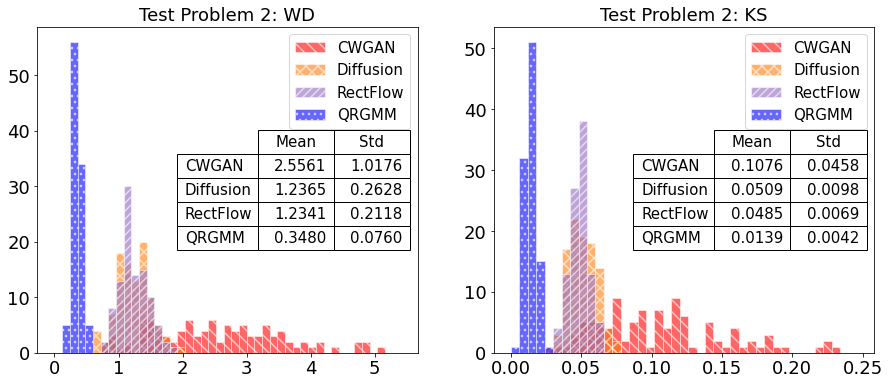

In [4]:
plt.rcParams['hatch.linewidth'] = 1.5  
# plt.rcParams['hatch.color'] = 'k'    

fig, a = plt.subplots(1, 2, figsize=(15, 6))

bins1 = np.arange(0, 5.5, 0.12)
bins2 = np.arange(0, 0.25, 0.006)

# ========================= WD hist =========================
a[0].hist(WD_CWGAN,      bins=bins1, density=False,
          color='red', alpha=0.6, label='CWGAN',
          edgecolor='w', hatch='\\\\', linewidth=0.8)

a[0].hist(WD_Diffusion,  bins=bins1, density=False,
          color='tab:orange', alpha=0.6, label='Diffusion',
          edgecolor='w', hatch='xx', linewidth=0.8)

a[0].hist(WD_RectFlow,   bins=bins1, density=False,
          color='tab:purple', alpha=0.6, label='RectFlow',
          edgecolor='w', hatch='///', linewidth=0.8)

a[0].hist(WD_QRGMM,      bins=bins1, density=False,
          color='blue', alpha=0.6, label='QRGMM',
          edgecolor='w', hatch='..', linewidth=0.8)

a[0].legend(fontsize=15)
a[0].tick_params(labelsize=18)
a[0].set_title("Test Problem 2: WD", fontsize=18)

col_labels = ['Mean', 'Std']
row_labels = [ 'CWGAN', 'Diffusion', 'RectFlow','QRGMM']
table_vals = [
    ["{:.4f}".format(np.mean(WD_CWGAN)),      "{:.4f}".format(np.std(WD_CWGAN,      ddof=1))],
    ["{:.4f}".format(np.mean(WD_Diffusion)),  "{:.4f}".format(np.std(WD_Diffusion,  ddof=1))],
    ["{:.4f}".format(np.mean(WD_RectFlow)),   "{:.4f}".format(np.std(WD_RectFlow,   ddof=1))],
    ["{:.4f}".format(np.mean(WD_QRGMM)),      "{:.4f}".format(np.std(WD_QRGMM,      ddof=1))]
]

my_table = a[0].table(
    cellText=table_vals,
    colWidths=[0.1] * 2,
    rowLabels=row_labels,
    colLabels=col_labels,
    edges='closed',
    loc='center right'
)
my_table.auto_set_font_size(False)
my_table.set_fontsize(15)
my_table.scale(2, 2)

# ========================= KS hist =========================
a[1].hist(KS_CWGAN,      bins=bins2, density=False,
          color='red', alpha=0.6, label='CWGAN',
          edgecolor='w', hatch='\\\\', linewidth=0.8)

a[1].hist(KS_Diffusion,  bins=bins2, density=False,
          color='tab:orange', alpha=0.6, label='Diffusion',
          edgecolor='w', hatch='xx', linewidth=0.8)

a[1].hist(KS_RectFlow,   bins=bins2, density=False,
          color='tab:purple', alpha=0.6, label='RectFlow',
          edgecolor='w', hatch='///', linewidth=0.8)

a[1].hist(KS_QRGMM,      bins=bins2, density=False,
          color='blue', alpha=0.6, label='QRGMM',
          edgecolor='w', hatch='..', linewidth=0.8)

a[1].legend(fontsize=15)
a[1].tick_params(labelsize=18)
a[1].set_title("Test Problem 2: KS", fontsize=18)

col_labels = ['Mean', 'Std']
row_labels = [ 'CWGAN', 'Diffusion', 'RectFlow','QRGMM']
table_vals = [
    ["{:.4f}".format(np.mean(KS_CWGAN)),      "{:.4f}".format(np.std(KS_CWGAN,      ddof=1))],
    ["{:.4f}".format(np.mean(KS_Diffusion)),  "{:.4f}".format(np.std(KS_Diffusion,  ddof=1))],
    ["{:.4f}".format(np.mean(KS_RectFlow)),   "{:.4f}".format(np.std(KS_RectFlow,   ddof=1))],
    ["{:.4f}".format(np.mean(KS_QRGMM)),      "{:.4f}".format(np.std(KS_QRGMM,      ddof=1))]
]

my_table = a[1].table(
    cellText=table_vals,
    colWidths=[0.1] * 2,
    rowLabels=row_labels,
    colLabels=col_labels,
    edges='closed',
    loc='center right'
)
my_table.auto_set_font_size(False)
my_table.set_fontsize(15)
my_table.scale(2, 2)
os.makedirs("./plot", exist_ok=True)
fig.savefig('./plot/WDKS_test_withtable_testproblem2.png',
            dpi=300, bbox_inches='tight')
plt.show()